In [ ]:
! mkdir data

In [ ]:
! cp -r  '/content/drive/MyDrive/processed_dataset' 'data/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/hi.zip -d './data'

Streaming output truncated to the last 5000 lines.
  inflating: ./data/new_train (1)/new_t/labels/172842.txt  
  inflating: ./data/new_train (1)/new_t/labels/172898.txt  
  inflating: ./data/new_train (1)/new_t/labels/172931.txt  
  inflating: ./data/new_train (1)/new_t/labels/172948.txt  
  inflating: ./data/new_train (1)/new_t/labels/172997.txt  
  inflating: ./data/new_train (1)/new_t/labels/173008.txt  
  inflating: ./data/new_train (1)/new_t/labels/173018.txt  
  inflating: ./data/new_train (1)/new_t/labels/173022.txt  
  inflating: ./data/new_train (1)/new_t/labels/173035.txt  
  inflating: ./data/new_train (1)/new_t/labels/173036.txt  
  inflating: ./data/new_train (1)/new_t/labels/173046.txt  
  inflating: ./data/new_train (1)/new_t/labels/173051.txt  
  inflating: ./data/new_train (1)/new_t/labels/173053.txt  
  inflating: ./data/new_train (1)/new_t/labels/173073.txt  
  inflating: ./data/new_train (1)/new_t/labels/173077.txt  
  inflating: ./data/new_train (1)/new_t/labels/17

In [ ]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define paths and parameters
dataset_path = '/content/processed_dataset/clothing_types'
folders = ['skirt-img', 'pants-img', 'dress-img']
num_classes = len(folders)

# Mapping folders to labels
folder_to_label = {folder: idx for idx, folder in enumerate(folders)}
print("Folder to label mapping:", folder_to_label)


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Creating the final model
model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Function to preprocess and load images
def load_and_preprocess_image(file_path):
    img = load_img(file_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Load data and labels
X = []
Y = []

for folder, label in folder_to_label.items():
    folder_path = os.path.join(dataset_path, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):
            file_path = os.path.join(folder_path, filename)
            img_data = load_and_preprocess_image(file_path)
            X.append(img_data)
            Y.append(label)


X = np.array(X)
Y = to_categorical(np.array(Y), num_classes=num_classes)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))

# Save the model
model.save('clothing_classification_model.h5')


Folder to label mapping: {'skirt-img': 0, 'pants-img': 1, 'dress-img': 2}
94765736/94765736 [==============================] - 1s 0us/step


Epoch 1/10
6/6 [==============================] - 48s 7s/step - loss: 3.2264 - accuracy: 0.3693 - val_loss: 2.3932 - val_accuracy: 0.5778
Epoch 2/10
6/6 [==============================] - 41s 7s/step - loss: 2.5609 - accuracy: 0.5398 - val_loss: 2.3553 - val_accuracy: 0.3778
Epoch 3/10
6/6 [==============================] - 38s 7s/step - loss: 1.2470 - accuracy: 0.5966 - val_loss: 0.8585 - val_accuracy: 0.6667
Epoch 4/10
6/6 [==============================] - 41s 7s/step - loss: 0.8361 - accuracy: 0.6932 - val_loss: 0.8901 - val_accuracy: 0.7333
Epoch 5/10
6/6 [==============================] - 41s 7s/step - loss: 0.6551 - accuracy: 0.7784 - val_loss: 0.6608 - val_accuracy: 0.8000
Epoch 6/10
6/6 [==============================] - 41s 7s/step - loss: 0.5145 - accuracy: 0.7955 - val_loss: 0.6459 - val_accuracy: 0.7333
Epoch 7/10
6/6 [==============================] - 42s 7s/step - loss: 0.3638 - accuracy: 0.8580 - val_loss: 0.7615 - val_accuracy: 0.7778
Epoch 8/10
6/6 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step
2
Predicted class: dress-img
skirt-img: 1.96%
pants-img: 0.53%
dress-img: 97.51%


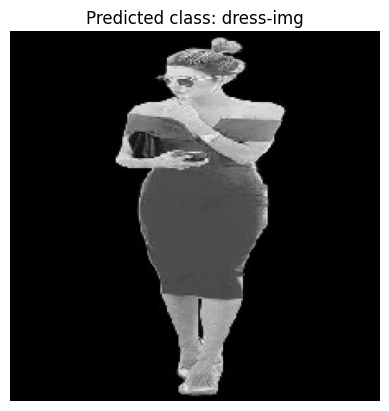

In [ ]:
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input
import numpy as np

model_path = 'clothing_classification_model.h5'
model = load_model(model_path)

# test_image
test_image_path = '/content/processed_dataset/clothing_types/dress-img/Copy of 7.jpeg'

# Load and preprocess the image
def prepare_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img, img_array

# Load image with preprocessing
test_img, test_img_array = prepare_image(test_image_path)

# Predict the class of the image
predictions = model.predict(test_img_array)
predicted_class = np.argmax(predictions, axis=1)
print(predicted_class[0])

index_to_class = {v: k for k, v in folder_to_label.items()}

print(f'Predicted class: {index_to_class[predicted_class[0]]}')
predicted_probabilities = predictions[0]
for i, prob in enumerate(predicted_probabilities):
    print(f'{index_to_class[i]}: {prob * 100:.2f}%')


plt.imshow(test_img)
plt.title(f'Predicted class: {index_to_class[predicted_class[0]]}')
plt.axis('off')
plt.show()


In [ ]:
model_path = 'clothing_classification_model.h5'  # Define the path and filename
model.save(model_path)

In [ ]:
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

In [ ]:
model.save('clothing_classification_model.h5')